# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [2]:
import math
import sys

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [4]:
# YOUR CODE HERE

file_path = "_deprecated_breast_cancer_wisconsin.tsv.gz"
df = pd.read_csv(file_path, sep="\t", compression="gzip")
print(df.sample(10))


     target      2      3       4       5        6        7         8  \
372       1  21.37  15.10  141.30  1386.0  0.10010  0.15150  0.193200   
22        1  15.34  14.26  102.50   704.4  0.10730  0.21350  0.207700   
308       0  13.50  12.71   85.69   566.2  0.07376  0.03614  0.002758   
109       0  11.34  21.26   72.48   396.5  0.08759  0.06575  0.051330   
239       1  17.46  39.28  113.40   920.6  0.09812  0.12980  0.141700   
146       1  11.80  16.58   78.99   432.0  0.10910  0.17000  0.165900   
268       0  12.87  16.21   82.38   512.2  0.09425  0.06219  0.039000   
342       0  11.06  14.96   71.49   373.9  0.10330  0.09097  0.053970   
329       1  16.26  21.88  107.50   826.8  0.11650  0.12830  0.179900   
102       0  12.18  20.52   77.22   458.7  0.08013  0.04038  0.023830   

            9      10  ...     22     23      24      25       26       27  \
372  0.125500  0.1973  ...  22.69  21.84  152.10  1535.0  0.11920  0.28400   
22   0.097560  0.2521  ...  18.07  19.08

YOUR ANSWERS HERE

I chose the breast cancer dataset because I wanted to explore health-care related data and understand how numerical features extracted from medical images can be used for classification. After loading .tsv.gz file using pandas with gzip compression, I displayed a random sample of 10 rows to get an initial sense of the dataset. Since the dataset has more than 10 columns, I will limit my later analysis to the first 10 (target to input column 10), as instructed.

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [23]:
# YOUR CODE HERE

column_names = df.columns[0:10].tolist()
print(column_names)

['target', '2', '3', '4', '5', '6', '7', '8', '9', '10']


DESCRIPTION:
1) Target: A binary value (0 or 1) indicating whether the tumor is benign (0) or malignant (1).
2) radius: The average distance from the center of the cell nucleus out to its perimeter. Larger values typically indicate larger tumor cells.
3) texture: The variation in pixel intensity across the tumor image. Higher texture means the tissue surface varies more.
4) perimeter: The total length around the boundary of the cell nucleus.
4) area: The amount of space enclosed inside the cell nucleus boundary.
5) smoothness: Measures how even or irregular the edges of the nucleus are. Lower values mean smoother borders.
6) compactness: A measure that captures how dense or tightly packed the nucleus structure is.
7) concavity: Describes the amount of inward curvature along the cell boundary. Higher concavity often indicates more irregular cell shapes.
8) concave points: number of inward indentations along nuclear border
9) symmetry: The count of specific inward-curving regions along the nucleus border.
10) fractal dimension: A measure of how symmetric the cell nucleus is when comparing its left and right sides.

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

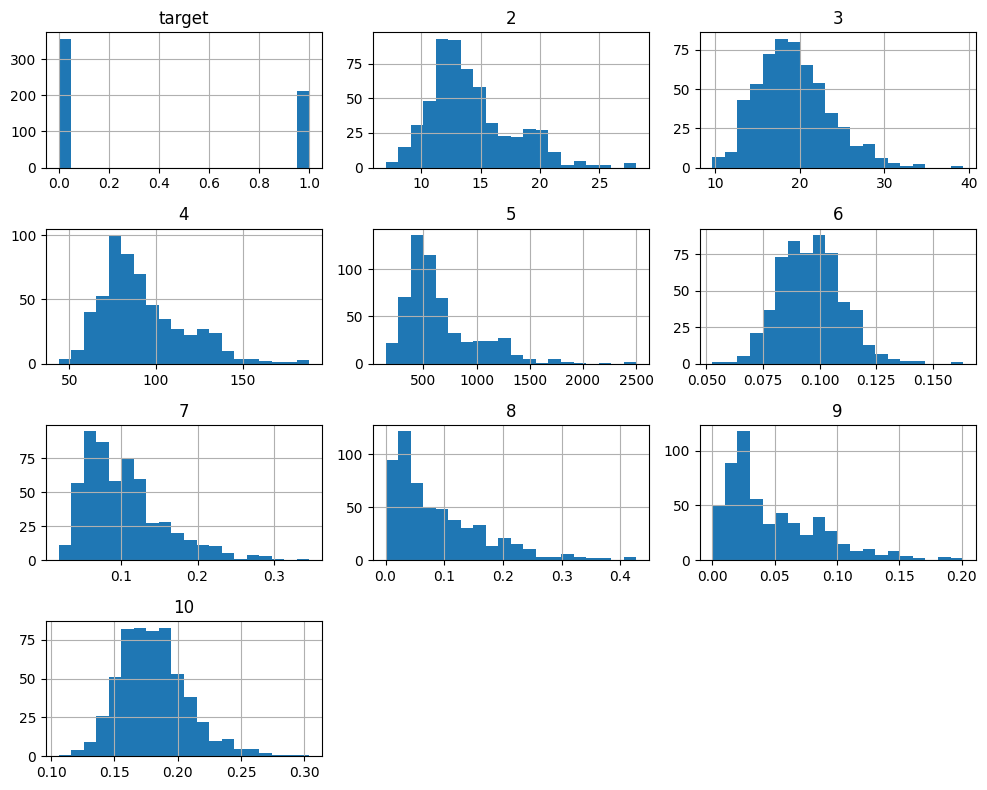

In [25]:
# YOUR CODE HERE
df.iloc[:, :10].hist(figsize=(10, 8), bins=20) 

plt.tight_layout()
plt.show()


YOUR ANSWERS HERE

Column target:

    Shape: Two spikes at 0/1; no in-between values

    Distribution: Bernoulli/Binary

    Explanation: The target is categorical with two possible outcomes (0/1)             

Column 2 (radius):

    Shape: Single peak, slightly skewed right, tail toward higher values

    Distribution: Approximately Normal (skewed Right)

    Explanation: Bell-shaped curve but not perfectly symmetric

Column 3 (texture):

    Shape: Bell-shaped, mildly skewed right

    Distribution: Approximately Normal

    Explanation: Most values cluster around a central mean with few extreme values

Column 4 (perimeter):

    Shape: Strong right skew, long upper tail

    Distribution: Right-skewed / Log-normal

    Explanation: Log-normal model matches positive values with long upper tails
    
Column 5 (smoothness):

    Shape: Strong right skew, many low values, rare large values

    Distribution: Right-skewed / Log-normal

    Explanation: Long tail suggests multiplicative rather than symmetric variation
    
Column 6 (compactness):
    Shape: Symmetric and concentrated at the peak

    Distribution: Normal

    Explanation: Clean bell curve with little skew or tail distortion

Column 7 (concavity):

    Shape: Right-skewed, sharp initial peak, long tail

    Distribution: Exponential / Right-skewed

    Explanation: Values drop off quickly as they increase (exponential-like)

Column 8 (concave points):

    Shape: Strong right skew with many small values and long tail

    Distribution: Exponential

    Explanation: High probability of small values, low probability of large values

Column 9 (symmetry):

    Shape: Right-skewed, compressed near zero with gradual upward tail

    Distribution: Exponential / Log-normal

    Explanation: Mostly small values with decreasing frequency as values increase

Column 10 (fractal dimension):

    Shape: Unimodal, fairly symmetric, slight right tail

    Distribution: Approximately Normal

    Explanation: Forms a bell curve around a clear central mean with only mild skew



### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

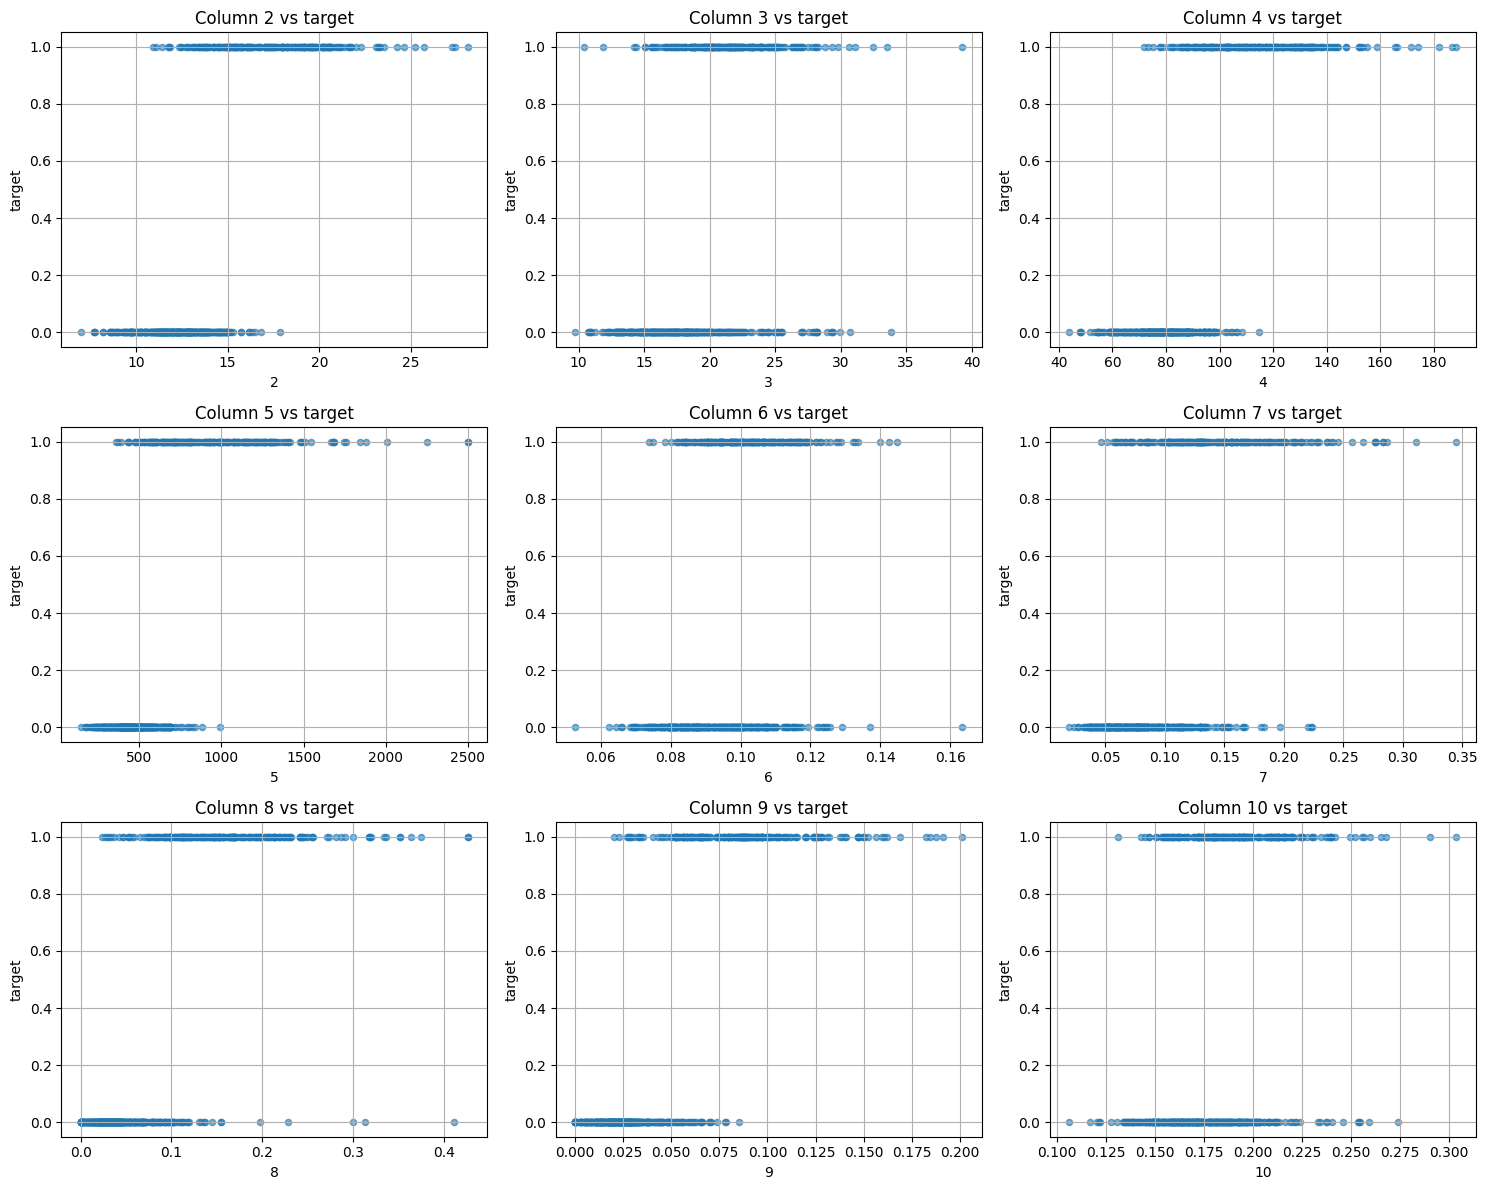

In [32]:
output_col = "target"
input_cols = df.columns[1:10]   # first 9 input columns

fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for ax, col in zip(axes.ravel(), input_cols):
    ax.scatter(df[col], df[output_col], alpha=0.6, s=20)
    ax.set_title(f'Column {col} vs {output_col}')
    ax.set_xlabel(col)
    ax.set_ylabel(output_col)
    ax.grid(True)

plt.tight_layout()
plt.show()

INDEPENDENT / NOT INDEPENDENT:

Column 2 vs Target — NOT INDEPENDENT    
There is a clear separation between classes: malignant tumors occur at higher radius values, 
while benign tumors cluster at the lower end. The two horizontal bands do not overlap much,
showing strong dependence.

Column 3 vs Target — NOT INDEPENDENT  
Texture values tend to be higher for malignant cases. The scatter plot shows a shift upward
in the malignant band, meaning the feature influences the target.

Column 4 vs Target — NOT INDEPENDENT  
Perimeter is strongly associated with the diagnosis. Larger perimeters correspond mostly
to malignant tumors, with benign tumors concentrated at smaller values.

Column 5 vs Target — NOT INDEPENDENT  
Area shows one of the clearest separations. Malignant tumors have significantly larger areas,
forming a distinct upper band compared to benign cases.

Column 6 vs Target — MILDLY INDEPENDENT  
Smoothness shows considerable overlap between classes. Although there is a slight upward shift
in malignant cases, the relationship is weak and the scatter is heavily mixed.

Column 7 vs Target — NOT INDEPENDENT  
Compactness shows a noticeable difference in distribution. Malignant tumors appear more often
at higher compactness values, while benign tumors cluster lower.

Column 8 vs Target — NOT INDEPENDENT  
Concavity strongly differentiates classes. Malignant cases lie consistently at larger concavity
values, creating a clear separation from benign cases.

Column 9 vs Target — NOT INDEPENDENT  
Concave points also shows strong separation: malignant tumors have more concave point features,
while benign tumors cluster tightly at smaller values.YOUR ANSWERS HERE

Column 10 vs Target — MILDLY INDEPENDENT  
Symmetry does not cleanly separate the classes. There is significant overlap, and the malignant
and benign bands look similar, indicating only weak dependence.

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

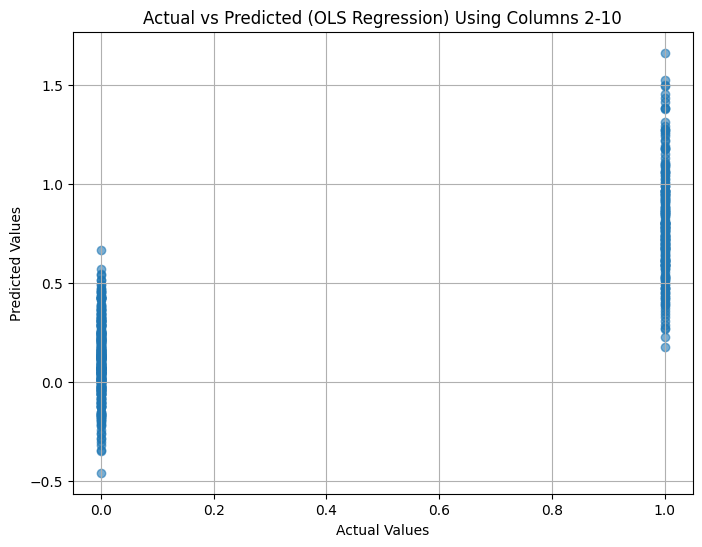

Mean Squared Error: 0.07415877165089299


In [8]:
# YOUR CODE HERE

# Select input columns 2–10 (excluding target)
input_cols = df.columns[1:10] # input columns 2–10
X = df[input_cols].values
y = df['target'].values # extract target

# Fit OLS regression
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Mean squared error
mse = np.mean((y - y_pred) ** 2)

# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (OLS Regression) Using Columns 2-10")
plt.grid(True)
plt.show()

print("Mean Squared Error:", mse)


YOUR ANSWERS HERE       

(Applied MSE to the first 10 columns (target + Column 2-10), since this dataset contains more than 10 columns, as instructed in Problem 1.)  

The Mean Squared Error (MSE) of the model is 0.07415877165089299. From the plot of the actual vs predicted values, we can see that the model is correctly seperating the two classes. Predicted values cluster near 0 when actual value is 0, and predicted values cluster near 1 when actual value is 1. Although some predictions fall slightly above 1 or below 0 due to the linear regression output, the overall trend shows that the model captures the relationship between the input features and the target reasonably well.  

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [9]:
# YOUR CODE HERE

from sklearn.linear_model import LinearRegression


output_col = "target"
input_cols = df.columns[1:10] # the 9 input features

mse_results = {}

for col in input_cols:
    X = df[[col]].values # single feature
    y = df[output_col].values

    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    mse = np.mean((y - y_pred)**2)
    
    mse_results[col] = mse

mse_results


{'2': np.float64(0.10918191465390867),
 '3': np.float64(0.19346888719617128),
 '4': np.float64(0.1048418558709502),
 '5': np.float64(0.11626114891064912),
 '6': np.float64(0.20371097114167994),
 '7': np.float64(0.15057917664221235),
 '8': np.float64(0.12040843012990107),
 '9': np.float64(0.09277454816052517),
 '10': np.float64(0.20823104106093268)}

In [10]:
best_feature = min(mse_results, key=mse_results.get)
best_feature, mse_results[best_feature]

('9', np.float64(0.09277454816052517))

YOUR ANSWERS HERE

Input Column: "9 Vs. Target" gives the best linear model of the target on its own as it produces the lowest MSE (~0.0928) among all individual input columns. However, this single-feature model still underperforms compared to the full-linear model in problem 5, which has an even lower MSE (~0.0742). This shows that while input column 9 has the strongest individual predictor, since breast cancer outcome depends on multiple factors, including all features leads to a more accurate model. 

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

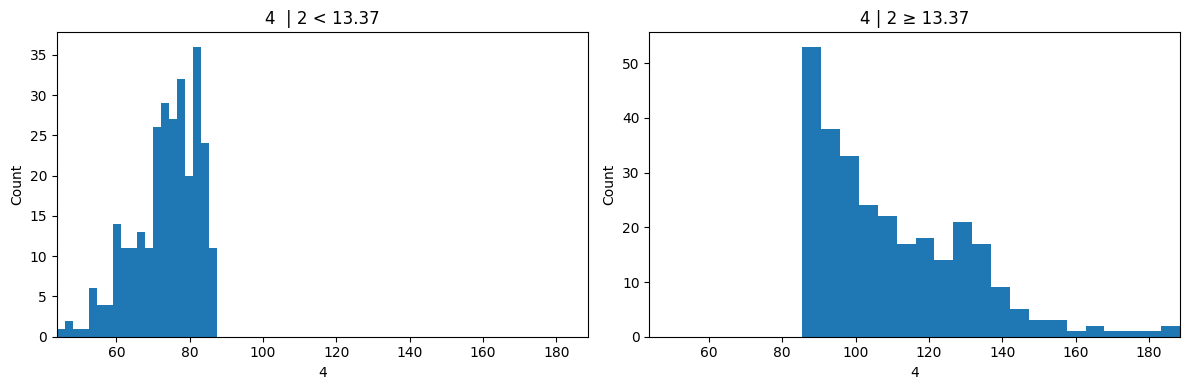

In [31]:
# YOUR CODE HERE

# two columns with visible dependency
x_col = df.columns[1]   # Column 2 (radius)
y_col = df.columns[3]   # Column 4 (perimeter)


t = df[x_col].median() # threshold (median split)

# split into two groups
low = df[df[x_col] < t][y_col] # below median
high = df[df[x_col] >= t][y_col] # above median

# shared x-axis range 
xmin, xmax = df[y_col].min(), df[y_col].max()

# side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

# low group histogram
axes[0].hist(low, bins=20)
axes[0].set_title(f"{y_col}  | {x_col} < {t:.2f}")
axes[0].set_xlabel(y_col)
axes[0].set_ylabel("Count")
axes[0].set_xlim(xmin, xmax)

# high group histogram
axes[1].hist(high, bins=20)
axes[1].set_title(f"{y_col} | {x_col} ≥ {t:.2f}")
axes[1].set_xlabel(y_col)
axes[1].set_ylabel("Count")
axes[1].set_xlim(xmin, xmax)

plt.tight_layout()
plt.show()


YOUR ANSWERS HERE

I chose Column 2 as the splitting variable and Column 4 as the variable to plot histograms. Using the median of Column 2 as the threshold t, I plotted Column 4 separately for rows when Column 2 < t (low) and when Column 2 >= t (high).      

When Column 2 is high (above the median). However, when Column 2 is low (below the median) the histogram of Column 4 shifts toward larger values, showing a clear and noticeable change in distribution.    

This contrast demonstrates a visual dependency between columns 2 and 4. Larger values of column 2 are generally associated with larger values of column 4.

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

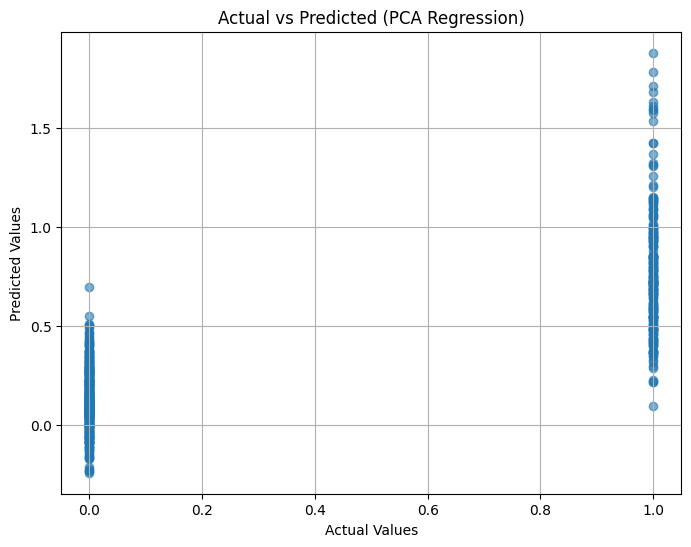

Variance explained by first half of components: 0.9486413734724087
MSE using PCA-based model: 0.08286307319831542


In [12]:
# YOUR CODE HERE
input_cols = df.columns[1:10]
X = df[input_cols].values
y = df['target'].values

from sklearn.preprocessing import StandardScaler # Standardize the input features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

pca = PCA() # PCA on all components
pca.fit(data_scaled)

d = len(input_cols)
half = d // 2 # first half of the components 

variance_first_half = pca.explained_variance_ratio_[:half].sum()
pca_transformed_data = pca.transform(data_scaled)[:, :half] 

model = sklearn.linear_model.LinearRegression() # Linear regression using PCA features
model.fit(pca_transformed_data, y)

y_pred = model.predict(pca_transformed_data)
mse_pca = np.mean((y - y_pred) ** 2)

plt.figure(figsize=(8, 6)) # Plot actual vs predicted
plt.scatter(y, y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (PCA Regression)")
plt.grid(True)
plt.show()

print("Variance explained by first half of components:", variance_first_half)
print("MSE using PCA-based model:", mse_pca)

YOUR ANSWERS HERE

Using PCA, the first half of the principal components (4 PCs) explain about 94.9% of the total variation in the input features. After fitting a linear regression model using only these PCA-derived features, the model produces an MSE of approximately 0.0829, which is higher (and therefore worse) than the MSE of the earlier OLS model that used all original input columns (~0.0528).

Although the PCA model is more compact and still retains most of the variance in the data, the actual vs. predicted plot shows noticeably more spread, especially within each class (0 and 1). This indicates that using only the first half of the PCA components reduces predictive accuracy compared to the full-feature OLS regression model.

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [13]:
input_cols = df.columns[1:10]
X = df[input_cols]

corr_matrix = X.corr().abs()

np.fill_diagonal(corr_matrix.values, 0)

row_with_max = corr_matrix.max(axis=1).idxmax()

col_with_max = corr_matrix.loc[row_with_max].idxmax()

col1, col2 = row_with_max, col_with_max
highest_corr_val = X.corr().loc[col1, col2]

print(f"Most correlated pair of input columns: {col1} and {col2}")
print(f"Correlation between them: {highest_corr_val:.3f}")

loadings = pd.DataFrame(
    pca.components_[:3],
    columns=input_cols,
    index=[f"PC{i+1}" for i in range(3)]
)

print("\nLoadings of these two columns in the first 3 principal components:")
print(loadings[[col1, col2]])


Most correlated pair of input columns: 2 and 4
Correlation between them: 0.998

Loadings of these two columns in the first 3 principal components:
            2         4
PC1  0.372859  0.384153
PC2 -0.335060 -0.302332
PC3 -0.160187 -0.147242


YOUR ANSWERS HERE

The pair of input columns with the highest correlation are Column 2 and Column 4, with a correlation of 0.998, which show the strongest and almost perfect linear relationship in the correlation matrix.

This strong correlation is reflected in the PCA loadings:   

In PC1, both columns have large positive coefficients (~0.373 and ~0.384), meaning they contribute heavily and in the same direction to the component. This shows that PCA identifies shared variance and combines them into the same dominant principal direction.     

In PC2, both coefficients are again large and of the same sign (both negative), showing that the second principal component also captures a shared pattern between these two features. 

Overall, the PCA loadings confirm that Columns 2 and 4 move together across the dataset, so PCA groups their variation tightly into the first few principal components. 

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

Most Outlier Row Index: 122

Outlier Row Values:
2       24.2500
3       20.2000
4      166.2000
5     1761.0000
6        0.1447
7        0.2867
8        0.4268
9        0.2012
10       0.2655
Name: 122, dtype: float64

Target Value for Outlier Row: 1

Total Outlier Score: 27.412945237379457


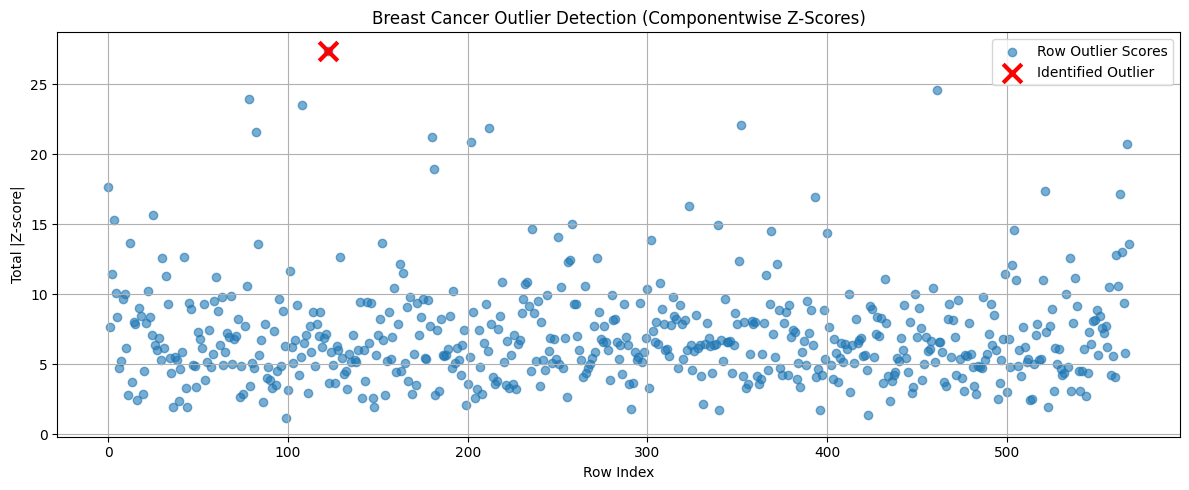

In [29]:
# YOUR CODE HERE

X = df[df.columns[1:10]]

z_scores = (X - X.mean()) / X.std() # compute z-scores

row_scores = z_scores.abs().sum(axis=1) # outlier score = sum of absolute z-scores per row

outlier_idx = row_scores.idxmax() # index and row of most extreme observation
outlier_row = X.loc[outlier_idx]

print("Most Outlier Row Index:", outlier_idx)
print("\nOutlier Row Values:")
print(outlier_row)
print("\nTarget Value for Outlier Row:", df.loc[outlier_idx, 'target'])
print("\nTotal Outlier Score:", row_scores[outlier_idx])

# Visualization
plt.figure(figsize=(12, 5))
plt.scatter(range(len(row_scores)), row_scores, alpha=0.6, label="Row Outlier Scores")
plt.scatter(outlier_idx, row_scores[outlier_idx],
            s=180, marker='x', color='red', linewidth=3,
            label="Identified Outlier")

plt.xlabel("Row Index")
plt.ylabel("Total |Z-score|")
plt.title("Breast Cancer Outlier Detection (Componentwise Z-Scores)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


YOUR ANSWERS HERE

To find the outlier, I computed the univariate z-score of every input feature (Columns 2-10) and measured how far each row deviates from the mean in standard deviation units. For each row, I summed the absolute z-scores across all columns to create a single multivariate outlier score. The row with the highest total deviation was identified as the outlier, since it is the point that differs the most across multiple features at once.

This approach highlights observations that are extreme in several dimensions, rather than just one. In the scatter plot, the identified row appears as a clear red “X” that sits far above the general cluster of points, showing that its total |z-score| is substantially larger than that of any other row. This confirms that it is a strong multivariate outlier relative to the rest of the dataset.

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE